In [1]:
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)

In [3]:
df=pd.read_csv("/Users/vijayaditya/Documents/Personal Projects/instacart/Datasets/instacart_merged.csv")

In [4]:
 '''orders = pd.read_csv("orders.csv")
order_products_prior = pd.read_csv("order_products__prior.csv")
order_products_train = pd.read_csv("order_products__train.csv")
products = pd.read_csv("products.csv")
aisles = pd.read_csv("aisles.csv")
departments = pd.read_csv("departments.csv")'''

'orders = pd.read_csv("orders.csv")\norder_products_prior = pd.read_csv("order_products__prior.csv")\norder_products_train = pd.read_csv("order_products__train.csv")\nproducts = pd.read_csv("products.csv")\naisles = pd.read_csv("aisles.csv")\ndepartments = pd.read_csv("departments.csv")'

In [5]:
#order_products_prior.shape

In [6]:
#print(order_products_prior.info())

In [7]:
'''order_products_prior['order_id'] = order_products_prior['order_id'].astype('int32')
order_products_prior['product_id'] = order_products_prior['product_id'].astype('int32')
order_products_prior['add_to_cart_order'] = order_products_prior['add_to_cart_order'].astype('int32')
order_products_prior['reordered'] = order_products_prior['reordered'].astype('int32')'''

"order_products_prior['order_id'] = order_products_prior['order_id'].astype('int32')\norder_products_prior['product_id'] = order_products_prior['product_id'].astype('int32')\norder_products_prior['add_to_cart_order'] = order_products_prior['add_to_cart_order'].astype('int32')\norder_products_prior['reordered'] = order_products_prior['reordered'].astype('int32')"

In [8]:
#print(order_products_prior.info())

In [9]:
# combine prior and train order products

#order_products = pd.concat([order_products_prior,order_products_train],axis = 0)

In [10]:
# merge products on aisles and departments

#products_merged = (products.merge(aisles,on = "aisle_id",how = "left").merge(departments,on = "department_id",how = "left"))

In [11]:
# master analysis dataframe

#df = (order_products.merge(orders, on = "order_id", how="left").merge(products_merged, on = "product_id", how="left"))

In [12]:
# check for missing values

#df.isnull().mean().sort_values(ascending=False).head()

In [13]:
# check for duplicates

#df.duplicated().sum()

In [14]:
df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,pantry


In [15]:
df.shape

(33819106, 15)

In [16]:
'''df.to_csv("instacart_merged.csv", index = False)'''
# export to csv


'df.to_csv("instacart_merged.csv", index = False)'

In [17]:
#print(df.info())

In [18]:
'''# Optimizing datatypes for memory efficiency
df['aisle'] = df['aisle'].astype('category')
df['department'] = df['department'].astype('category')
df['eval_set'] = df['eval_set'].astype('category')'''

"# Optimizing datatypes for memory efficiency\ndf['aisle'] = df['aisle'].astype('category')\ndf['department'] = df['department'].astype('category')\ndf['eval_set'] = df['eval_set'].astype('category')"

In [19]:
#df['eval_set'].value_counts()

In [20]:
# orders by eval_set

#df['eval_set'].value_counts(normalize = True)

In [21]:
#df["reordered"].mean()

In [22]:
'''(
    df.groupby('order_number')['reordered']
      .mean()
      .reset_index()
      .head(15)
)
'''

"(\n    df.groupby('order_number')['reordered']\n      .mean()\n      .reset_index()\n      .head(15)\n)\n"

In [23]:
'''basket_size = (
    df.groupby('order_id')['product_id']
      .count()
      .rename('basket_size')
)

basket_size.describe()'''


"basket_size = (\n    df.groupby('order_id')['product_id']\n      .count()\n      .rename('basket_size')\n)\n\nbasket_size.describe()"

In [24]:
'''dept_reorder = (
    df.groupby('department')['reordered']
      .mean()
      .sort_values(ascending=False)
)

dept_reorder.head(10)'''


"dept_reorder = (\n    df.groupby('department')['reordered']\n      .mean()\n      .sort_values(ascending=False)\n)\n\ndept_reorder.head(10)"

In [25]:
#dept_volume = df['department'].value_counts(normalize=True)


In [26]:
#df.groupby('order_dow')['order_id'].nunique()


In [27]:
#df.groupby('order_hour_of_day')['reordered'].mean()


In [28]:
'''product_stats = (
    df.groupby(['product_id', 'product_name'])
      .agg(
          total_purchases=('order_id', 'count'),
          reorder_rate=('reordered', 'mean')
      )
      .query('total_purchases >= 100')
      .sort_values('reorder_rate', ascending=False)
)'''


"product_stats = (\n    df.groupby(['product_id', 'product_name'])\n      .agg(\n          total_purchases=('order_id', 'count'),\n          reorder_rate=('reordered', 'mean')\n      )\n      .query('total_purchases >= 100')\n      .sort_values('reorder_rate', ascending=False)\n)"

In [29]:
'''(
    df.groupby('add_to_cart_order')['reordered']
      .mean()
      .head(20)
)'''


"(\n    df.groupby('add_to_cart_order')['reordered']\n      .mean()\n      .head(20)\n)"

------------------------- # START HERE -----------

# EDA and Answering Business Questions

### Check how many unique orders , users and products - Sanity check

In [30]:
df[['order_id','user_id','product_id']].nunique()

order_id      3346083
user_id        206209
product_id      49685
dtype: int64

### Is instacart re-order driven platform

In [31]:
df['reordered'].mean()

0.5900617242809434

### 59% of all items purchased are reorders, which means Instacart is not primarily a discovery platform.It is a habitual, replenishment-driven business.

## How re-order behaviour changes over time

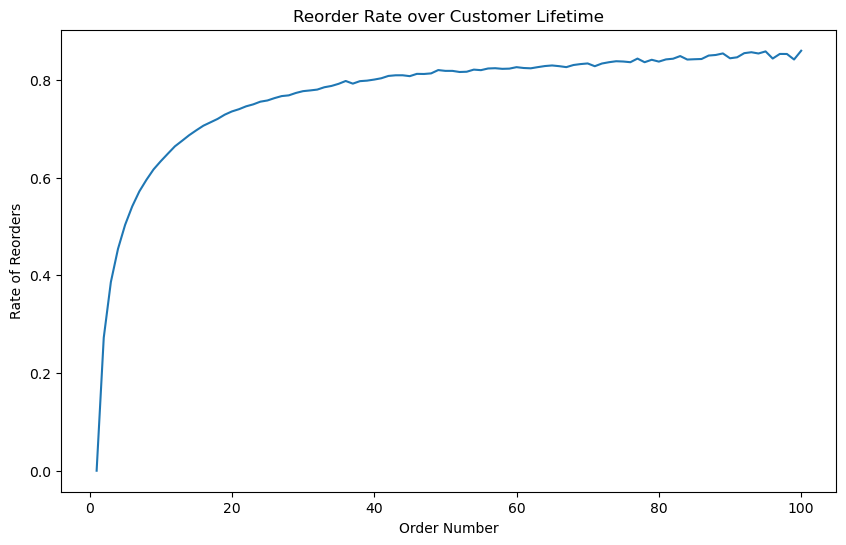

In [32]:
order_reorder = (
    df.groupby('order_number')['reordered'].mean().reset_index()
)

plt.figure(figsize=(10,6))
plt.plot(order_reorder['order_number'],order_reorder['reordered'])
plt.xlabel('Order Number')
plt.ylabel('Rate of Reorders')
plt.title('Reorder Rate over Customer Lifetime')
plt.show()

### Re-order rate rises very sharply approximately after 5 to 10 orders. After 20 orders the curve flattens and beyond that point behaviour is stable and predictable.

# BUSINESS PROBLEM: BASKET SIZE & ORDER COMPOSITION

# How do customers structure their orders, and where do recommendations actually fit?

In [33]:
# How big is a typical basket?
basket_size = df.groupby('order_id')['product_id'].count()
basket_size.describe()

count    3.346083e+06
mean     1.010707e+01
std      7.542326e+00
min      1.000000e+00
25%      5.000000e+00
50%      8.000000e+00
75%      1.400000e+01
max      1.450000e+02
Name: product_id, dtype: float64

## Interpretation
- The average number of items per order is 10
- The median of basket has 8 items for every order
- 75% of orders have either 14 items or fewer.

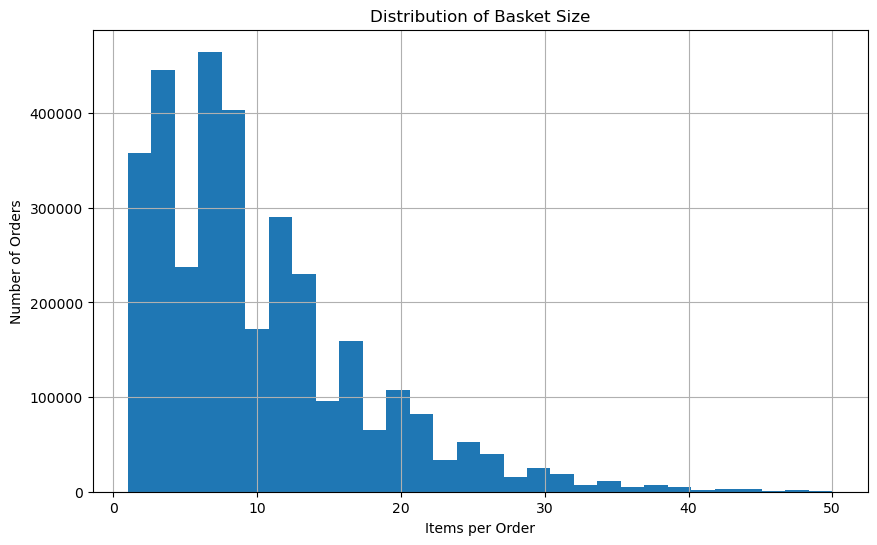

In [34]:
# Basket size distribution
plt.figure(figsize=(10,6))
basket_size[basket_size <= 50].hist(bins=30)
plt.xlabel('Items per Order')
plt.ylabel('Number of Orders')
plt.title('Distribution of Basket Size')
plt.show()

### Most orders cluster between 5–15 items. Very large orders exist but they are rare

# 3. What drives repeat purchases ?

In [35]:
# Which product categories drive customer retention?

dept_stats = (
    df.groupby('department').agg(reorder_rate = ('reordered','mean'),volume = ('order_id','count')).sort_values('reorder_rate',ascending = False)
)
dept_stats.head(7),dept_stats.tail(7)

(            reorder_rate   volume
 department                       
 dairy eggs      0.670161  5631067
 beverages       0.653651  2804175
 produce         0.650521  9888378
 bakery          0.628381  1225181
 deli            0.608130  1095540
 pets            0.602557   102221
 babies          0.577680   438743,
                reorder_rate   volume
 department                          
 canned goods       0.458639  1114857
 other              0.407052    38086
 household          0.403339   774652
 missing            0.394323    77396
 international      0.369682   281155
 pantry             0.347400  1956819
 personal care      0.321863   468693)

### Interpretation
- Dairy eggs, beverages, produce, bakery and deli are absolute retention department with over 60% re-order rate
- Pets and Babies have moderate retention rate
- Pantry and personal care are less influence in retentioning a customer.

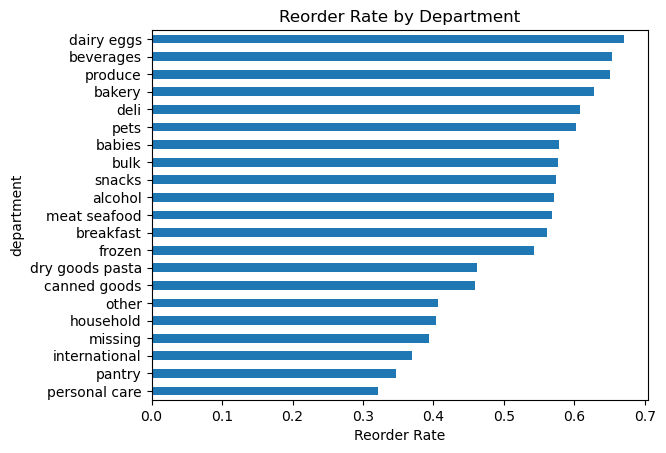

In [36]:
dept_stats.sort_values('reorder_rate').plot(kind = 'barh',y = 'reorder_rate',legend = False)
plt.xlabel('Reorder Rate')
plt.title('Reorder Rate by Department')
plt.show()


# 4. What do customers buy (Time analysis)

In [37]:
# orders by day of week
orders_by_dow = (df.groupby('order_dow')['order_id'].nunique())
orders_by_dow 

order_dow
0    585237
1    576377
2    458074
3    428087
4    417171
5    443388
6    437749
Name: order_id, dtype: int64

### The numbers say that,
- Sunday being 0 and Monday being 1 have the highest number of orders
- Wednesday (3) and Thursday (4) have the lowest number of orders being in the middle of the week
- Orders on Friday(5) and Saturday (6) are increasing but not peaked like sunday and monday

In [38]:
# reorder by day of the week
reordered_by_dow = (
    df.groupby('order_dow')['reordered'].mean()
)
reordered_by_dow

order_dow
0    0.586483
1    0.603672
2    0.589720
3    0.586289
4    0.591123
5    0.595902
6    0.575244
Name: reordered, dtype: float64

### What the numbers show

- Monday (1) has the highest reorder rate (~60.4%)

- Friday and Thursday are also relatively high

- Saturday (6) has the lowest reorder rate (~57.5%)

## At what time of day are customers most likely to place habitual (reorder-heavy) orders?

In [39]:
# order volume by hour of day
orders_by_hour = (
    df.groupby('order_hour_of_day')['order_id'].nunique()
)
orders_by_hour

order_hour_of_day
0      22224
1      12103
2       7375
3       5343
4       5393
5       9374
6      29913
7      90032
8     174664
9     252529
10    282470
11    278616
12    266828
13    271885
14    276659
15    277207
16    266444
17    223433
18    178556
19    137341
20    102087
21     76486
22     59982
23     39139
Name: order_id, dtype: int64

### Insights from the numbers
- Very low activity between 1 AM to 5 AM
- Sharp rise between 7 AM to 9 AM
- Peak order hours are between 9AM to 4PM
- Gradual decline after 6PM

In [40]:
# Check if this is habitual or exploratory
reorder_by_hour = (
    df.groupby('order_hour_of_day')['reordered'].mean()
)
reorder_by_hour

order_hour_of_day
0     0.565726
1     0.558149
2     0.555574
3     0.560501
4     0.572370
5     0.608569
6     0.637050
7     0.644669
8     0.632315
9     0.619589
10    0.600541
11    0.587608
12    0.579631
13    0.580306
14    0.581763
15    0.580848
16    0.579052
17    0.575546
18    0.573941
19    0.574947
20    0.582856
21    0.591403
22    0.586041
23    0.580071
Name: reordered, dtype: float64

### What the numbers show

- Highest reorder rates:
  6–8 AM (peak at ~7 AM: 64.5%)

- Reorder rate declines steadily after 9 AM

- Lowest reorder behavior occurs late night or early morning

- Afternoon and evening are moderate but flatter

# 5.What products anchor baskets and drive repeat behavior?

In [41]:
# Which products are habit-forming vs optional?

product_stats = (
    df.groupby(['product_id','product_name'])
      .agg(
          total_purchases = ('order_id','count'),
          reorder_rate = ('reordered','mean')
      )
      .query('total_purchases >= 100')
      .sort_values('reorder_rate',ascending = False)        
)

product_stats.head(10)

,,total_purchases,reorder_rate
product_id,product_name,,
27740,Chocolate Love Bar,102,0.921569
35604,Maca Buttercups,104,0.894231
38251,Benchbreak Chardonnay,111,0.891892
10236,Fragrance Free Clay with Natural Odor Eliminator Cat Litter,131,0.870229
20598,Thousand Island Salad Snax,114,0.868421
35496,Real2 Alkalized Water 500 ml,457,0.862144
9292,Half And Half Ultra Pasteurized,2995,0.861436
45504,Whole Organic Omega 3 Milk,9410,0.859830
17469,Lo-Carb Energy Drink,484,0.859504


### Anchor products that are habitual high order rate , high volume scale and basket presence

In [42]:
anchor_products = (
    product_stats
    .query('total_purchases >= 5000')
    .sort_values('reorder_rate',ascending= False)
)

anchor_products.head(10)

,,total_purchases,reorder_rate
product_id,product_name,,
45504,Whole Organic Omega 3 Milk,9410,0.859830
43394,Organic Lactose Free Whole Milk,8742,0.859186
29447,"Milk, Organic, Vitamin D",20770,0.854742
38689,Organic Reduced Fat Milk,36869,0.851501
34197,Goat Milk,5353,0.850177
24852,Banana,491291,0.845051
39180,Organic Lowfat 1% Milk,15352,0.841193
31720,Organic Whole Milk,10102,0.840824
2748,Organic Reduced Fat Omega-3 Milk,5299,0.838838


### Insights
- 9 out of 10 products re-ordered are milk. That is 90% of customers reorder milk with every order in the basket.


## Do anchor products lead to larger baskets?

In [43]:
anchor_ids = anchor_products.index.get_level_values('product_id')
df['has_achor'] = df['product_id'].isin(anchor_ids)

In [44]:
# rename column has_achor to has_anchor
df.rename(columns={'has_achor': 'has_anchor'}, inplace=True)

In [45]:
df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department,has_anchor
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs,True
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce,True
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,pantry,True
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,pantry,False
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,pantry,False


In [46]:
# Basket size comparison
basket_size = (
    df.groupby('order_id')
    .agg(
        items = ('product_id','count'),
        has_anchor = ('has_anchor','max')
    )
)

basket_size.groupby('has_anchor')['items'].describe()

,count,mean,std,min,25%,50%,75%,max
has_anchor,,,,,,,,
False,234723.0,3.259898,2.741070,1.0,1.0,2.0,4.0,51.0
True,3111360.0,10.623629,7.537086,1.0,5.0,9.0,14.0,145.0


## Business Insights from numbers

 ### Orders without anchor products
- Average basket size is 3.3 items
- Median basket is 2 items
- Mostly small orders

### Orders with Anchor products
- Average basket size is 10 items
- Median basket is 9 items
- Large and planned orders

# 6. Modelling reccommendation

In [47]:
# Will user will reorder product in their next order

df['user_product_reorder_rate'] = (
    df.groupby(
        ['user_id','product_id']
    )['reordered'].transform('mean')
)

In [48]:
# keeping only re-ordering customers
model_df = df[df['user_product_reorder_rate']>0].copy()

In [49]:
# user-level anchor affinity
user_anchor_affinity = (
    df.groupby('user_id')['has_anchor']
      .mean()
)

model_df['user_anchor_affinity'] = model_df['user_id'].map(user_anchor_affinity)


In [50]:
model_df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department,has_anchor,user_product_reorder_rate,user_anchor_affinity
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs,True,0.833333,0.34
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce,True,0.800000,0.34
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,pantry,False,0.800000,0.34
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,pantry,False,0.666667,0.34
5,2,17794,6,1,202279,prior,3,5,9,8.0,Carrots,83,4,fresh vegetables,produce,True,0.857143,0.34


In [51]:
# Select features for modeling

features = model_df[[
    'user_product_reorder_rate',
    'days_since_prior_order',
    'order_dow',
    'order_hour_of_day',
    'user_anchor_affinity',
    'reordered'
]]

In [52]:
# Train-test split
from sklearn.model_selection import train_test_split

X = features.drop('reordered',axis=1)
y = features['reordered']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [53]:
X_train.shape

(20415872, 5)

In [54]:
X_train.isna().sum()


user_product_reorder_rate         0
days_since_prior_order       987959
order_dow                         0
order_hour_of_day                 0
user_anchor_affinity              0
dtype: int64

In [55]:
X_train = X_train.copy()
X_test = X_test.copy()

X_train['days_since_prior_order'] = X_train['days_since_prior_order'].fillna(0)
X_test['days_since_prior_order'] = X_test['days_since_prior_order'].fillna(0)

X_train['user_anchor_affinity'] = X_train['user_anchor_affinity'].fillna(0)
X_test['user_anchor_affinity'] = X_test['user_anchor_affinity'].fillna(0)


In [56]:
# train model

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(
    max_iter=200,
    n_jobs=-1,
    solver='lbfgs'
)

lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=200, n_jobs=-1)

In [57]:
#lr_model.fit(X_train, y_train)


In [58]:
coef_df = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': lr_model.coef_[0]
}).sort_values('coefficient', ascending=False)

coef_df

,feature,coefficient
0,user_product_reorder_rate,6.115374
4,user_anchor_affinity,0.105377
1,days_since_prior_order,0.038852
2,order_dow,0.003984
3,order_hour_of_day,-0.003534


In [59]:
# predict probabilities
y_prob = lr_model.predict_proba(X_test)[:, 1]

In [60]:
# build a test frame
test_results = X_test.copy()
test_results['actual'] = y_test.values
test_results['predicted_prob'] = y_prob


In [61]:
# Precision@K (Business Metric)
def precision_at_k(df, k=5):
    df = df.sort_values('predicted_prob', ascending=False)
    return df.head(k)['actual'].mean()

precision_at_k(test_results, k=5)


1.0

In [62]:
test_results = model_df.loc[X_test.index, ['user_id']].join(test_results)


In [63]:
def precision_at_k_user(df, k=5):
    precisions = []
    for _, user_df in df.groupby('user_id'):
        if len(user_df) >= k:
            user_df = user_df.sort_values('predicted_prob', ascending=False)
            precisions.append(user_df.head(k)['actual'].mean())
    return sum(precisions) / len(precisions)

precision_at_k_user(test_results, k=5)


0.8538874824956434

# -------------------------- # Deep Learning ----------------------

In [1]:
import pandas as pd
import numpy as np  
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
from collections import defaultdict

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [3]:
orders_products = pd.read_csv(
    "/Users/vijayaditya/Documents/Personal Projects/instacart/Datasets/order_products__prior.csv",
    usecols=["order_id", "product_id"]
)

print(orders_products.head())
print(orders_products.shape)

   order_id  product_id
0         2       33120
1         2       28985
2         2        9327
3         2       45918
4         2       30035
(32434489, 2)


In [4]:
assert "order_id" in orders_products.columns
assert "product_id" in orders_products.columns

orders_products.head()


,order_id,product_id
0,2,33120
1,2,28985
2,2,9327
3,2,45918
4,2,30035


In [5]:
products = pd.read_csv(
    "/Users/vijayaditya/Documents/Personal Projects/instacart/Datasets/products.csv",
    usecols=["product_id", "product_name", "department_id"]
)

departments = pd.read_csv(
    "/Users/vijayaditya/Documents/Personal Projects/instacart/Datasets/departments.csv",
    usecols=["department_id", "department"]
)

print(products.head())
print(products.dtypes)

   product_id                                       product_name  \
0           1                         Chocolate Sandwich Cookies   
1           2                                   All-Seasons Salt   
2           3               Robust Golden Unsweetened Oolong Tea   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4           5                          Green Chile Anytime Sauce   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
product_id        int64
product_name     object
department_id     int64
dtype: object


In [6]:
# columns: product_id, product_name, department_id

product_id_to_name = dict(
    zip(products["product_id"], products["product_name"])
)

product_name_to_id = {
    name.lower(): pid
    for pid, name in product_id_to_name.items()
}

product_id_to_dept = (
    products
    .merge(departments, on="department_id")
    .set_index("product_id")["department"]
    .to_dict()
)


In [7]:
all_products = orders_products["product_id"].unique()

product_id_to_idx = {
    pid: i + 1
    for i, pid in enumerate(all_products)
}

idx_to_product_id = {
    v: k for k, v in product_id_to_idx.items()
}

NUM_PRODUCTS = len(product_id_to_idx)


In [8]:
order_to_products = (
    orders_products
    .groupby("order_id")["product_id"]
    .apply(list)
    .to_dict()
)



In [9]:
from collections import defaultdict

cooccur_count = defaultdict(lambda: defaultdict(int))

for products_in_order in order_to_products.values():
    unique_products = set(products_in_order)
    for p in unique_products:
        for q in unique_products:
            if p != q:
                cooccur_count[p][q] += 1


In [10]:
MAX_CONTEXT = 20
positive_samples = []

for products_in_order in tqdm(order_to_products.values()):
    if len(products_in_order) < 2:
        continue

    for target in products_in_order:
        context = [p for p in products_in_order if p != target]
        context = context[:MAX_CONTEXT]

        positive_samples.append({
            "context": context,
            "target": target,
            "label": 1
        })


100%|██████████| 3214874/3214874 [14:05<00:00, 3801.55it/s]  


In [11]:
# negative samples
import random

NEGATIVE_SAMPLES = 3
all_products = list(product_id_to_idx.keys())

training_samples = []

for sample in positive_samples[:100_000]:
    training_samples.append(sample)

    forbidden = set(sample["context"] + [sample["target"]])

    negatives = random.sample(all_products, NEGATIVE_SAMPLES)
    for neg in negatives:
        if neg not in forbidden:
            training_samples.append({
                "context": sample["context"],
                "target": neg,
                "label": 0
            })


In [12]:
# dataset class

class BasketDataset(Dataset):
    def __init__(self, samples, max_len=20):
        self.samples = samples
        self.max_len = max_len

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        s = self.samples[idx]

        context_idx = [
            product_id_to_idx[p]
            for p in s["context"]
            if p in product_id_to_idx
        ]

        context_idx = context_idx[:self.max_len]
        context_idx += [0] * (self.max_len - len(context_idx))

        return (
            torch.tensor(context_idx),
            torch.tensor(product_id_to_idx[s["target"]]),
            torch.tensor(s["label"], dtype=torch.float)
        )


In [13]:
# basket embeddings

class BasketRecommender(nn.Module):
    def __init__(self, num_products, embedding_dim):
        super().__init__()

        self.embedding = nn.Embedding(
            num_products + 1,
            embedding_dim,
            padding_idx=0
        )

    def forward(self, context_items, target_item):
        context_emb = self.embedding(context_items)

        mask = (context_items != 0).float()
        context_emb = context_emb * mask.unsqueeze(-1)

        basket_vec = context_emb.sum(dim=1) / mask.sum(dim=1, keepdim=True).clamp(min=1)

        target_vec = self.embedding(target_item)

        logits = (basket_vec * target_vec).sum(dim=1)
        return logits


In [14]:
# training setup

dataset = BasketDataset(training_samples)
loader = DataLoader(dataset, batch_size=256, shuffle=True)

model = BasketRecommender(
    num_products=len(product_id_to_idx),
    embedding_dim=64
).to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [15]:
# training loop

for epoch in range(3):
    model.train()
    total_loss = 0

    for context, target, label in loader:
        context = context.to(device)
        target = target.to(device)
        label = label.to(device)

        optimizer.zero_grad()
        logits = model(context, target)
        loss = criterion(logits, label)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1} | Loss: {total_loss/len(loader):.4f}")


Epoch 1 | Loss: 1.2391
Epoch 2 | Loss: 1.0475
Epoch 3 | Loss: 0.8731


In [16]:
def basket_overlap(candidate_pid, basket):
    """
    How many basket items historically support this candidate?
    """
    return sum(
        1 for p in basket
        if cooccur_count[p].get(candidate_pid, 0) > 0
    )


In [17]:
def recommend_products(basket, top_k=2):
    model.eval()

    # ---- context tensor ----
    basket_idx = [
        product_id_to_idx[p]
        for p in basket
        if p in product_id_to_idx
    ]

    basket_idx = basket_idx[:20] + [0] * (20 - len(basket_idx))
    context = torch.tensor([basket_idx]).to(device)

    # ---- basket-size-aware threshold ----
    basket_size = len(basket)
    if basket_size <= 2:
        min_overlap = 1
    elif basket_size <= 4:
        min_overlap = 2
    else:
        min_overlap = 3

    scores = []

    with torch.no_grad():
        for pid, idx in product_id_to_idx.items():
            if pid in basket:
                continue

            # NEW: basket-size-aware filtering
            overlap = basket_overlap(pid, basket)
            if overlap < min_overlap:
                continue

            # model score (logit)
            logit = model(context, torch.tensor([idx]).to(device)).item()

            # optional: overlap-weighted score
            final_score = logit * (1 + 0.3 * overlap)

            scores.append((pid, final_score))

    scores.sort(key=lambda x: x[1], reverse=True)
    return scores[:top_k]


In [18]:
def interactive_basket():
    basket = []

    print("\n Interactive Basket Recommender")
    print("Type a product name (case-insensitive).")
    print("Type 'done' to stop.\n")

    while True:
        user_input = input("Add product: ").strip().lower()

        if user_input == "done":
            print("\n Session ended.")
            break

        if user_input not in product_name_to_id:
            print(" Product not found. Try again.\n")
            continue

        pid = product_name_to_id[user_input]

        if pid in basket:
            print(" Product already in basket.\n")
            continue

        basket.append(pid)

        print(f"\n  Added: {product_id_to_name[pid]}\n")

        recommendations = recommend_products(basket, top_k=2)

        if recommendations:
            print(" Recommended pairings:")
            for i, (rec_pid, score) in enumerate(recommendations, 1):
                print(
                    f"  {i}. {product_id_to_name[rec_pid]} "
                    f"(rank score: {score:.2f})"
                )
        else:
            print("  No suitable pairings found.")

        print("\n Current basket:")
        for p in basket:
            print(f"  - {product_id_to_name[p]}")

        print("\n" + "-" * 45 + "\n")


In [22]:
interactive_basket()



 Interactive Basket Recommender
Type a product name (case-insensitive).
Type 'done' to stop.


  Added: Cookies

 Recommended pairings:
  1. Snack Stacks! Original Potato Crisps (rank score: 24.19)
  2. Dry Roasted Peanuts (rank score: 18.29)

 Current basket:
  - Cookies

---------------------------------------------


  Added: Eggs

 Recommended pairings:
  1. Mini Bagels, Whole Grain Blueberry (rank score: 22.37)
  2. Special K Protein Milk Chocolate Protein Shakes (rank score: 20.06)

 Current basket:
  - Cookies
  - Eggs

---------------------------------------------


 Session ended.


# Save model and mappings

In [25]:
import os

os.makedirs("/Users/vijayaditya/Documents/Personal Projects/instacart/models", exist_ok=True)


In [27]:
MODEL_PATH = "/Users/vijayaditya/Documents/Personal Projects/instacart/models/basket_recommender.pth"

In [28]:
# save model
torch.save(
    {
        "model_state_dict": model.state_dict(),
        "num_products": model.embedding.num_embeddings - 1,
        "embedding_dim": model.embedding.embedding_dim,
    },
    MODEL_PATH
)



In [29]:
# Save mappings 

import pickle

with open("models/product_id_to_idx.pkl", "wb") as f:
    pickle.dump(product_id_to_idx, f)

with open("models/idx_to_product_id.pkl", "wb") as f:
    pickle.dump(idx_to_product_id, f)

with open("models/product_id_to_name.pkl", "wb") as f:
    pickle.dump(product_id_to_name, f)
